C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3256\3385139054.py:8: UserWarning: torchaudio.utils.download.download_asset has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  SAMPLE_WAV = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")


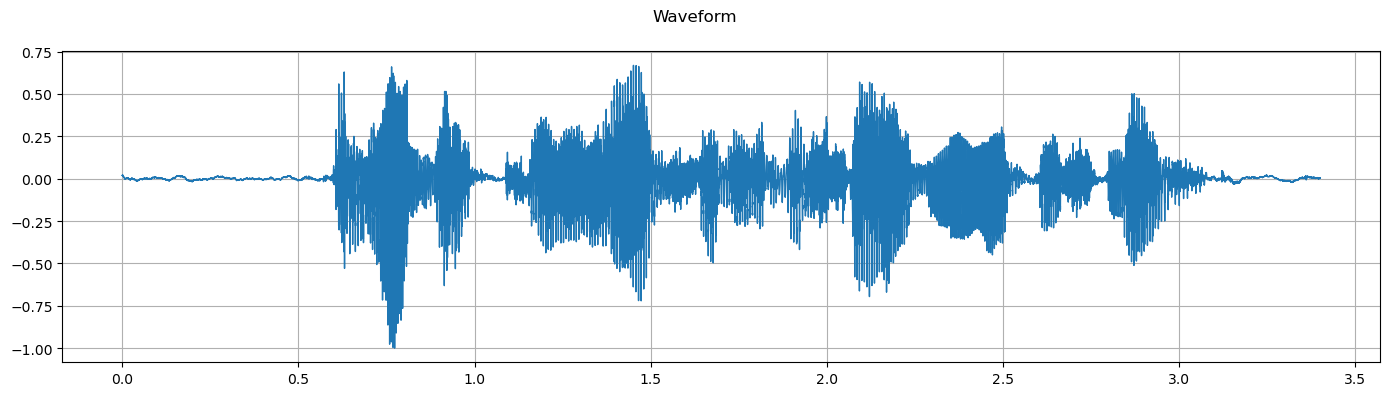

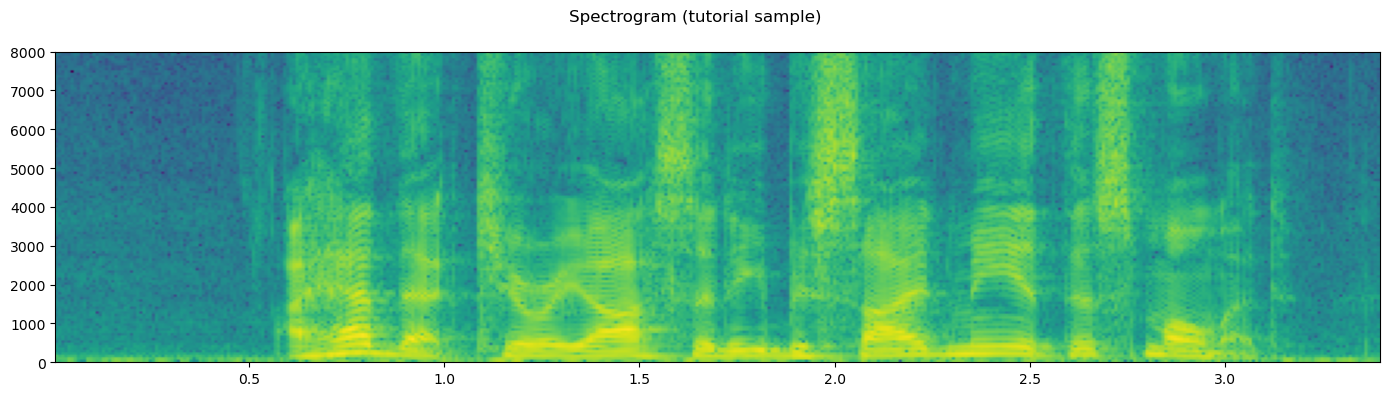

In [ ]:
#Plot waveform and spectrogram of a sample audio with torchaudio.
import torch
import torchaudio
import matplotlib.pyplot as plt
from torchaudio.utils import download_asset


SAMPLE_WAV = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")

waveform, sample_rate = torchaudio.load(SAMPLE_WAV)  # shape: (channels, frames)


def plot_waveform(waveform, sample_rate):
    wf = waveform.numpy()
    num_channels, num_frames = wf.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1, figsize=(14, 4))
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, wf[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("Waveform")
    plt.tight_layout()
    plt.show()

def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    wf = waveform.numpy()
    num_channels, _ = wf.shape

    figure, axes = plt.subplots(num_channels, 1, figsize=(14, 4))
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(wf[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)
    plt.tight_layout()
    plt.show()


plot_waveform(waveform, sample_rate)
plot_specgram(waveform, sample_rate, title="Spectrogram (tutorial sample)")
